# Reconnaissance de chiffres manuscrits (réseau de neurones à une seule couche)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reconnaissance-de-chiffres-manuscrits-(réseau-de-neurones-à-une-seule-couche)" data-toc-modified-id="Reconnaissance-de-chiffres-manuscrits-(réseau-de-neurones-à-une-seule-couche)-1">Reconnaissance de chiffres manuscrits (réseau de neurones à une seule couche)</a></span></li><li><span><a href="#Données" data-toc-modified-id="Données-2">Données</a></span><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-2.1">Import</a></span></li><li><span><a href="#Transformation-et-encodage" data-toc-modified-id="Transformation-et-encodage-2.2">Transformation et encodage</a></span></li><li><span><a href="#Images" data-toc-modified-id="Images-2.3">Images</a></span></li></ul></li><li><span><a href="#Classifieur-à-une-seule-couche-cachée-(sans-biais)" data-toc-modified-id="Classifieur-à-une-seule-couche-cachée-(sans-biais)-3">Classifieur à une seule couche cachée (sans biais)</a></span><ul class="toc-item"><li><span><a href="#Nombre-de-perceptrons" data-toc-modified-id="Nombre-de-perceptrons-3.1">Nombre de perceptrons</a></span></li><li><span><a href="#Epochs" data-toc-modified-id="Epochs-3.2">Epochs</a></span></li></ul></li><li><span><a href="#Classifieur-à-une-seule-couche-cachée-(avec-biais)" data-toc-modified-id="Classifieur-à-une-seule-couche-cachée-(avec-biais)-4">Classifieur à une seule couche cachée (avec biais)</a></span></li></ul></div>

In [3]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Données 

## Import

In [4]:
train_data = np.loadtxt("data/digits_train.csv", delimiter=',')
test_data = np.loadtxt("data/digits_test.csv", delimiter=",")

# D: 28*28 (img) + 1 (classe)

In [5]:
print(train_data.shape)
train_data

(60000, 785)


array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.]])

In [6]:
print(test_data.shape)
test_data

(10000, 785)


array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [4., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.]])

## Transformation et encodage

In [7]:
std = 0.98/255

train = np.asfarray(train_data[:, 1:]) * std + 0.01
#train = np.array([t[1:] for t in train_data]) * std + 0.01
train_labels = np.array(pd.get_dummies([t[0] for t in train_data]))
#train_labels = np.asfarray(train_data[:, 0]) 

test = np.asfarray(test_data[:, 1:]) * std + 0.01
#test = np.array([t[1:] for t in test_data]) * std + 0.01
test_labels = np.array(pd.get_dummies([t[0] for t in test_data]))
#test_labels = np.asfarray(test_data[:, 0])

print(test.shape)
test, test_labels

(10000, 784)


(array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        ...,
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]]),
 array([[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

## Images

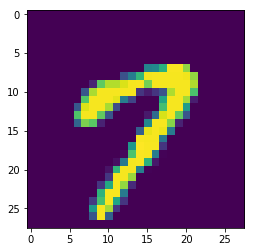

In [88]:
plt.imshow(train[15].reshape((28,28)));

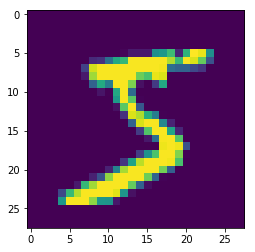

In [73]:
plt.imshow(train[0].reshape((28,28)));

# Classifieur à une seule couche cachée (sans biais)

In [140]:
@np.vectorize
def sigmoid(x):
    return 1/(1+ math.exp(-x))

In [151]:
class NeuralNetwork():
    
    def __init__(self, nb_input, nb_perceptrons, nb_output, lr):
        self.nb_input = nb_input               # Taille d'une donnée
        self.nb_perceptrons = nb_perceptrons   # Nombre de perceptrons dans la couche cachée
        self.nb_output = nb_output             # Nombre de classes
        self.lr = lr                           # Learning rate
        self.init_matrix()                     # Méthode d'initialisation des matrices de poids
        
    def init_matrix(self):
        
        # Poids input -> couche cachée
        self.W_hl = np.random.normal(0, 1, (self.nb_perceptrons, self.nb_input))
        # Poids couche cachée -> output
        self.W_o = np.random.normal(0, 1, (self.nb_output, self.nb_perceptrons))

        
    def train_one(self, input_data, target):
        """
        Entrainement sur une donnée
        """
        
        input_vector = np.array(input_data, ndmin=2).T
        target_vector = np.array(target, ndmin=2).T

        # Couce cachée + activation
        output_vector1 = np.dot(self.W_hl, input_vector)
        output_hidden = sigmoid(output_vector1)

        # Sortie + activation
        output_vector2 = np.dot(self.W_o, output_hidden)
        output = sigmoid(output_vector2)

        # Erreur en sortie
        output_errors = target_vector - output

        # Retro-propagation
        tmp = - output_errors * output * (1. - output)  # expression du gradient par activation sigmoid

            # Couche cachée
        tmp = self.lr * np.dot(tmp, output_hidden.T)
        self.W_o = self.W_o - tmp                       # W <- W - lr*∇
        hidden_errors = np.dot(self.W_o.T, output_errors)
        
            # Input
        tmp = - hidden_errors * output_hidden * (1. - output_hidden)
        self.W_hl = self.W_hl - self.lr * np.dot(tmp, input_vector.T)
    
    
    def train(self, data, targets):
        """
        Entrainement sur tout le dataset
        """
        
        for i in range(len(data)):
            self.train_one(data[i], targets[i])
    
    def predict(self, input_vector):
        """
        Prediction de la classe d'une donnée
        
        Returns :
        array(10,) : résultat par classe
        """
        
        input_vector = np.array(input_vector, ndmin=2).T
        
        output_vector1 = np.dot(self.W_hl, input_vector)
        hidden_layer = sigmoid(output_vector1)
        
        output_vector2 = np.dot(self.W_o, hidden_layer)
        output = sigmoid(output_vector2)
        
        return output
    
    
    def accuracy(self, data, labels):
        """
        Calcul de la précision 
        """
        
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.predict(data[i])
            res_max = np.argmax(res)
            if labels[i][res_max] == 1:
                corrects += 1
            else : 
                wrongs += 1

        return corrects / (wrongs + corrects)
        
    
    def train_epochs(self, train_data, train_targets, val_data, val_targets, epochs):
        """
        epochs * Entrainements sur tout le dataset et calculs de précision
        
        Parameters :
        train_data (array)
        train_targets (array)
        test_data (array)
        test_targets (array)
        epochs (int) : nombre d'époque d'entrainement
        
        Returns :
        list : liste de score par époque
        """
    
        accuracies = []
        print("---- Training on {} epochs ----\n".format(epochs))
        for epoch in range(epochs):
            self.train(train_data, train_targets)
            acc = self.accuracy(val_data, val_targetsk)
            accuracies.append(acc)
            print("epoch {} : {}".format(epoch + 1, acc))
        return accuracies

In [152]:
NN = NeuralNetwork(784, 50, 10, 0.05)
NN.train(train, train_labels)

In [57]:
acc = NN.accuracy(test, test_labels)
acc

0.9202

## Nombre de perceptrons

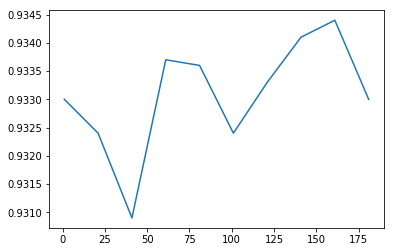

In [59]:
df_performance = pd.DataFrame(columns = ['#_hidden_perceptrons', 'accuracy'])

for i in tqdm(range(10)):
    nb_perceptrons = (2*i) * 10 + 1
    NN = NeuralNetwork(784, nb_hidden_layers, 10, 0.05)
    NN.train(train, train_labels)

    df_performance.loc[i,'#_hidden_perceptrons'] = nb_perceptrons
    df_performance.loc[i, 'accuracy'] = NN.accuracy(test, test_labels)
    
plt.plot(df_performance['#_hidden_perceptrons'], df_performance['accuracy'])
plt.show();

## Epochs

In [70]:
epochs = 10
NN = NeuralNetwork(784, 50, 10, 0.05)
accuracies = NN.train_epochs(train, train_labels, test, test_labels, epochs)

---- Training on 10 epochs ----

epoch 1 : 0.9206
epoch 2 : 0.9327
epoch 3 : 0.937
epoch 4 : 0.9421
epoch 5 : 0.9454
epoch 6 : 0.9473
epoch 7 : 0.9485
epoch 8 : 0.9492
epoch 9 : 0.9489
epoch 10 : 0.9504


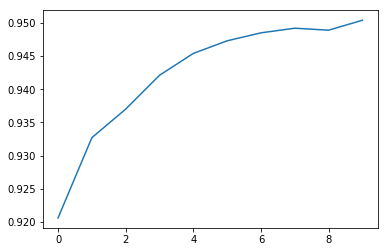

In [71]:
plt.plot(range(epochs), accuracies)
plt.show();

# Classifieur à une seule couche cachée (avec biais)

On peut implémenter un biais soit :
- en ajoutant une valeur (et donc un perceptron) égale à 1 aux données  
- en modifiant directement la fonction d''activation (act(x + b))

In [164]:
# Pour corriger : 
# init_matrix : self.W_hl = np.random.normal(0, 1, (self.nb_perceptrons + biais, self.nb_input + biais)) 
    # (ajouter le biais à self.nb_perceptrons)
# train_one : Ne pas ajouter le biais à output_hidden
# predict : Ne pas ajouter le biais à hidden_layer

class NeuralNetwork_B():
    
    def __init__(self, nb_input, nb_perceptrons, nb_output, lr, biais):
        
        # Taille d'une donnée
        self.nb_input = nb_input
        self.nb_perceptrons = nb_perceptrons   # Nombre de perceptrons dans la couche cachée
        self.nb_output = nb_output             # Nombre de classes
        self.lr = lr                           # Learning rate
        self.biais = biais
        self.init_matrix()                     # Méthode d'initialisation des matrices de poids

    def init_matrix(self):
        
        # Poids input -> couche cachée
        if self.biais :
            biais = 1
        else :
            biais = 0 
        self.W_hl = np.random.normal(0, 1, (self.nb_perceptrons + biais, self.nb_input + biais))
        # Poids couche cachée -> output
        self.W_o = np.random.normal(0, 1, (self.nb_output, self.nb_perceptrons + biais))

        
    def train_one(self, input_data, target):
        """
        Entrainement sur une donnée
        """
        
        if self.biais : 
            input_vector = np.array(np.append(input_data, [self.biais]), ndmin=2).T
        else :
            input_vector = np.array(input_data, ndmin=2).T
        target_vector = np.array(target, ndmin=2).T

        # Couce cachée + activation
        output_vector1 = np.dot(self.W_hl, input_vector) 
        output_hidden = sigmoid(output_vector1)

        #if self.biais :
        #    output_hidden = np.array(np.append(output_hidden, [self.biais]))

        # Sortie + activation
        output_vector2 = np.dot(self.W_o, output_hidden) 
        output = sigmoid(output_vector2)

        # Erreur en sortie
        output_errors = target_vector - output

        # Retro-propagation
        tmp = - output_errors * output * (1. - output)  # expression du gradient

            # Couche cachée
        tmp = self.lr * np.dot(tmp, output_hidden.T)
        self.W_o = self.W_o - tmp 
        hidden_errors = np.dot(self.W_o.T, output_errors)
        
            # Input
        tmp = - hidden_errors * output_hidden * (1. - output_hidden)
        self.W_hl = self.W_hl - self.lr * np.dot(tmp, input_vector.T)
    
    
    def train(self, data, targets):
        """
        Entrainement sur tout le dataset
        """
        for i in range(len(data)):
            self.train_one(data[i], targets[i])
    
    
    def predict(self, input_vector):
        """
        Prediction de la classe d'une donnée
        
        Returns :
        array(10,) : résultat par classe
        """
        
        if self.biais :
            input_vector = np.append(input_vector, [self.biais])
        input_vector = np.array(input_vector, ndmin=2).T
        
        output_vector1 = np.dot(self.W_hl, input_vector)
        hidden_layer = sigmoid(output_vector1)
        
        #if self.biais :
        #    hidden_layer = np.append(hidden_layer, self.biais)
        
        output_vector2 = np.dot(self.W_o, hidden_layer)
        output = sigmoid(output_vector2)
        
        return output
    
    
    def accuracy(self, data, labels):
        """
        Calcul de la précision 
        """
        
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.predict(data[i])
            res_max = np.argmax(res)
            if labels[i][res_max] == 1:
                corrects += 1
            else : 
                wrongs += 1

        return corrects / (wrongs + corrects)
        
    
    def train_epochs(self, train_data, train_targets, val_data, val_targets, epochs):
        """
        epochs * Entrainements sur tout le dataset et calculs de précision
        
        Parameters :
        train_data (array)
        train_targets (array)
        test_data (array)
        test_targets (array)
        epochs (int) : nombre d'époque d'entrainement
        
        Returns :
        list : liste de score par époque
        """
    
        accuracies = []
        print("---- Training on {} epochs ----\n".format(epochs))
        for epoch in range(epochs):
            self.train(train_data, train_targets)
            acc = self.accuracy(val_data, val_targets)
            accuracies.append(acc)
            print("epoch {} : {}".format(epoch + 1, acc))
        return accuracies

In [160]:
NNB = NeuralNetwork_B(784, 50, 10, 0.05, 1)
NNB.train(train, train_labels)

In [161]:
acc = NNB.accuracy(test, test_labels)
acc

0.9185

In [165]:
epochs = 10
NNB = NeuralNetwork_B(784, 50, 10, 0.05, 1)
accuracies = NNB.train_epochs(train, train_labels, test, test_labels, epochs)

---- Training on 10 epochs ----

epoch 1 : 0.9142
epoch 2 : 0.9298
epoch 3 : 0.9384
epoch 4 : 0.9434
epoch 5 : 0.9462
epoch 6 : 0.9502
epoch 7 : 0.9522
epoch 8 : 0.9531
epoch 9 : 0.9543
epoch 10 : 0.9546


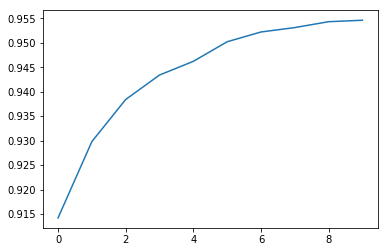

In [166]:
plt.plot(range(epochs), accuracies)
plt.show();